In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('csv_output.csv', delimiter="\t")

In [33]:
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

data["duration"].mean(skipna=True)

26.107935640095622

In [24]:
data['outcome'].value_counts().get("failed", 0)

26546

In [61]:
only_tests = data.drop_duplicates(subset=["job_id", 'test_name'])

only_tests["test_num"] = only_tests["test_name"].apply(lambda x: x.split('[')[1].split("-")[0] if "[" in x else "1")
only_tests["test_name"] = only_tests["test_name"].apply(lambda x: x.split('[')[0])

global_fail_rate = only_tests['outcome'].value_counts(normalize=True).get("failed", 0)

global_fail_rate

KeyError: 'job_id'
(For more detailed information type: python_error)


<ipython-input-61-0bb26c7441c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_tests["test_num"] = only_tests["test_name"].apply(lambda x: x.split('[')[1].split("-")[0] if "[" in x else "1")
<ipython-input-61-0bb26c7441c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_tests["test_name"] = only_tests["test_name"].apply(lambda x: x.split('[')[0])


In [75]:
pd.DataFrame(only_tests.groupby("job_id")['outcome'].value_counts(normalize=True)).reset_index().pivot(index="job_id", columns="proportion")

ValueError: Index contains duplicate entries, cannot reshape
(For more detailed information type: python_error)


<Axes: >

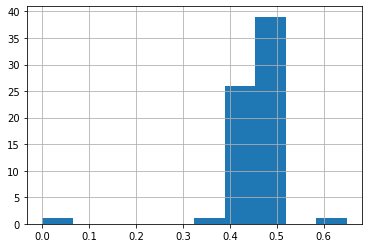

In [86]:
pd.DataFrame(only_tests.groupby("job_id")['outcome'].value_counts(normalize=True)).reset_index().pivot_table(values="proportion", index="job_id", columns="outcome", fill_value =0)["failed"].hist()

In [96]:
fail_rate_test = pd.DataFrame(only_tests.groupby("test_name")['outcome'].value_counts(normalize=True)).reset_index().pivot_table(values="proportion", index="test_name", columns="outcome", fill_value =0)["failed"]

In [116]:
top_ten = fail_rate_test[fail_rate_test<1].sort_values(ascending=False)

In [117]:
top_ten

test_name
state subscription on controller and subarray01          0.917073
configure rejected on ready subarray01 with pst beams    0.917073
assignresources rejected on subarray01 with pst beams    0.912195
obsstate subscription on subarray01                      0.902439
configure rejected on idle subarray01 with pst beams     0.897561
cspcontroller healthstate is unknown 1                   0.458537
configure without pst with beam assigned to subarray     0.336585
cspcontroller state is on 1                              0.312195
csp is inizialized twice 1                               0.312195
cbfsubarray01 state is off                               0.014634
cbfsubarray01 obsstate is empty                          0.014634
on command is issued on cspsubarray01 no argument        0.014634
cbf subarray is turned on                                0.014634
cbf subarray changes obsstate to idle                    0.014634
cspsubarray01 state is off                               0.014634


In [109]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

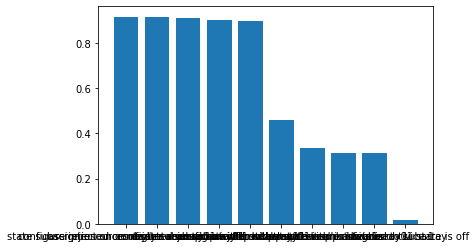

In [114]:
plt.bar(top_ten.index, top_ten)